# Планирование рекламной компании для интернет-магазина «Стримчик» на 2017 год

**Описание:** 

Из открытых источников доступны исторические данные о продажах игр интернет-маназина "Стримчик", оценки пользователей и экспертов, жанры и платформы

**Задачи:** 
- изучить данные
- подготовить данные для дальнейшего анализа
- провести исследовательский анализ данных
- выявить закономерности, определяющие успешность игры
- составить пользовательские портреты для Северной Америки, Японии и Европы
- задать и проверить гипотезы
- сделать выводы


**Цель:** 

На основе полученных данных сделать ставку на потенциально популярный продукт и спланировать рекламные
кампании на будущий год

### Содержание

1. [Изучение данных](#1id)
2. [Подготовка данных](#2id)
3. [Анализ данных](#3id)
    * [Количество игр в разные годы](#3.1id)
    * [Динамика продаж по платформам и годам](#3.2id)
    * [Анализ актуального периода 2012 - 2016 гг](#3.3id)
    * [Влияние отзывов на продажи](#3.4id)
    * [Распределение игр по жанрам](#3.5id)
4. [Портреты пользователей по регионам](#4id)
    * [Портрет пользователя Северной Америки](#4.1id)
    * [Портрет пользователя Европы](#4.2id)
    * [Портрет пользователя Японии](#4.3id)
5. [Общий вывод](#5id)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

## 1. Изучение данных <a id="1id"></a>

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
try:
    df = pd.read_csv('/home/olga/Downloads/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Пропуски

- **Название игры:**
всего два пропущенных названия. Есть смысл удалить две строки
- **Год выпуска:**
возможно, получится восполнить пропуски с помощью внешних источников
- **Жанр:**
предположительно, что пропуски те же, что и в названии игр
- **Оценка критиков:**
больше всего пропусков
- **Оценка пользователей:**
много пропусков
- **Рейтинг:**
много пропусков

Приведем все названия столбцов к нижнему регистру, а также заменим тип данных колонки "год выпуска" на int

## 2. Подготовка данных <a id="2id"></a>

Приведем все названия столбцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменим значения столбца "year_of_release" на целочисленный тип

### Столбец "name"

In [5]:
df['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [6]:
df['name'].duplicated().sum()

5155

In [7]:
df['name'].isna().sum()

2

Есть смысл удалить две строки, у которых неизвестно название игры

In [8]:
df = df.dropna(subset=['name']).reset_index()

### Столбец "platform"

In [9]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Пропущенных значений нет

### Столбец "year_of_release"

In [10]:
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

### Столбец "genre"

Представлено 12 различных игровых жанров. Пропущенных значений нет.

In [11]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [12]:
df['genre'].isna().sum()

0

### Столбец "critic_score"

Оценку критиков округлим до двух знаков после запятой. Пропущенных значений нет

In [13]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [14]:
# заменим тип данных с строкового на вещественный
df['critic_score'] = df['critic_score'].astype('float').round(2)
df['critic_score'].head()

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
Name: critic_score, dtype: float64

In [15]:
df['critic_score'].isna().sum()

8576

### Столбец "user_score"

In [16]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

В значениях столбца видим аббревиатуру "tbd", что скорее значит "to be determined", то есть "предстоит определить". Есть смысл заменить аббревиатуру просто на пустые значения

In [17]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [18]:
# заменим тип данных с строкового на вещественный
df['user_score'] = df['user_score'].astype('float')

In [19]:
df['user_score'].isna().sum()

9123

В столбцах с оценкой пользователей много пропусков. На саму оценку может влиять огромное количество факторов, поэтому восполнение пробелов медианой/средним/нулями будет некорректно.

### Столбец "rating"

Рассмотрим рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Описание рейтинга: http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya

- `«E»` («Everyone») — «Для всех»
- `«M»` («Mature») — «От 17 лет»
- `«T»` («Teen») — «Подросткам 13—19 лет»
- `«E10+»` («Everyone 10 and older») — «Для всех старше 10 лет»
- `«K-A»`("Kids to Adults")— "Для детей и взрослых"
- `«AO»` («Adults Only 18+») — «Только для взрослых»
- `«EC»` ("Early childhood") — "Для детей младшего возраста"
- `«RP»` ( «Rating Pending»») — «Рейтинг ожидается»

Википедия сообщает, что рейтинг "K-A" - это первоначальная версия рейтинга «E»:
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
Видимо, выборка была собрана из периода до и после изменения. Будем придерживаться актуального рейтинга и заменим обозначение старого рейтинга на новый и еще  раз проверим уникальные значения

In [21]:
df.loc[(df.rating == 'K-A'), 'rating'] = 'E'

In [22]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

### Суммарные продажи во всех регионах

Создадим дополнительный столбец, где посчитаем сумманый объем продаж во всех представленных регионах

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 3. Анализ данных <a id="3id"></a>

### 3.1 Количество игр в разные годы <a id="3.1id"></a>

Проанализируем количество игр, которые выпускались в разные годы 

In [24]:
df.groupby('year_of_release')['name'].count().sort_values()

year_of_release
1980.0       9
1984.0      14
1985.0      14
1988.0      15
1990.0      16
1987.0      16
1989.0      17
1983.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2000.0     350
1998.0     379
2001.0     482
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: name, dtype: int64

Почти в каждый год изучаемого периода выпускались игры. Исключения составляют 7 лет: 1986, 1987, 1989-1991, 1993, 1995. Открытые источники говорят, что игры выпускались ежегодно с 1985. Однако по каким-то причинам эти игры не были включены в датасет. Максимум подряд отсутствует статистика за три года. "Выпавшие" годы не сильно меняют картину, потому как тренд все равно четко прослеживается

https://www.igromania.ru/games/all/all/1986/


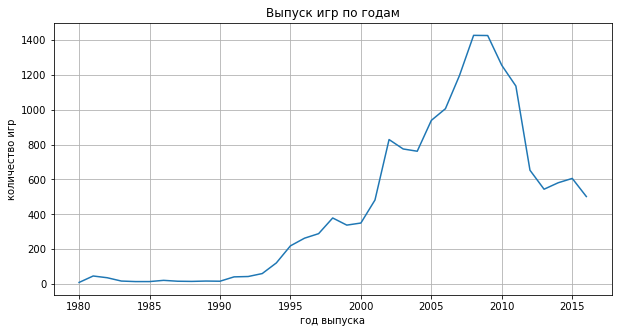

In [25]:
df.groupby('year_of_release')['name'].count().plot(figsize=(10,5), grid=True)
plt.title('Выпуск игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр');

Начало исследуемого периода начинается с очень маленького числа выпускаемых игр. Вероятно, это связано с кризисом компютерных игр (1983-1985 гг). Согласно исследованиям, падение рынка составило почти 97%:
https://ru.wikipedia.org/wiki/Кризис_индустрии_компьютерных_игр_1983_года

С 2000 года начался активный рост индустрии, пик которого пришелся на 2008 год. Далее последовал финансовый кризис, который сильно повлиял на геймдев, опустив показатели в несколько раз:
https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda

### 3.2 Динамика продаж по платформам и годам <a id="3.2id"></a>

Посмотрим, как менялись продажи по платформам. Выберем
платформы с наибольшими суммарными продажами и построим
распределение по годам. Узнаем, за какой характерный срок появляются
новые и исчезают старые платформы

In [26]:
# суммарные продажи по платформам
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Для наглядности построим график продаж игр по платформам за весь исследуемый период

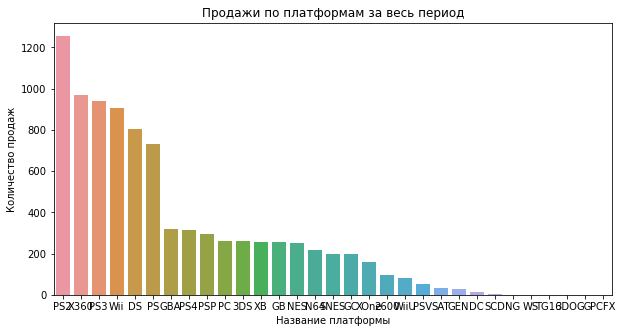

In [27]:
platform_rating = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=platform_rating.index,y=platform_rating['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");

Самые успешные платформы: PS2, X360, PS3, Wii, DS. Создадим переменную, в которую войдут топ 5 платформ, у которых показатели продаж выше остальных

In [28]:
top_5_platforms = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).sort_values(by='total_sales', ascending=False).head(5)

top_5_platforms

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


**Самыми прибыльными платформами оказались:**
- `Sony PlayStation 2`
- `Xbox 360`
- `Sony PlayStation 3`
- `Nintendo Wii`
- `Nintendo DS`

Перезапишем датафрейм топ-5 платформ со всеми остальными данными из общей таблицы и построим распределение выпуска игр по годам

In [29]:
top_5_platforms = df.query('platform in @top_5_platforms.index')
top_5_platforms.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


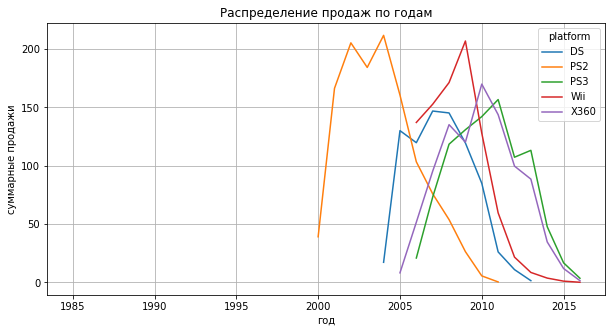

In [30]:
top_5_platforms.pivot_table(index='year_of_release', 
                             columns='platform', 
                             values='total_sales',
                             aggfunc='sum').plot(figsize=(10,5),
                                                 grid=True,
                                                 title='Распределение продаж по годам')
plt.xlabel('год')
plt.ylabel('суммарные продажи');

Как видно из графика, средняя продолжительность существования платформ - 8,4 года.
Пик роста количества платформ пришелся на 2004-2006 годы: почти каждый год появлялась новая игровая площадка

### 3.3 Анализ актуального периода 2012 - 2016 гг <a id="3.3id"></a>

Игровая индустрия меняется очень быстро. Основываясь на графиках выпуска игр по годам, а также распределения продаж различных платформ по годам, где продолжительность жизни платформ составляет 8-10 лет, а пика своей продуктивности достигают в среднем через 2-4 года, то для построения прогноза на 2017 года целесообразно взять для анализа последние 5 лет. 

In [31]:
actual_period = df.loc[df['year_of_release'] >= 2012]
actual_period['year_of_release'].unique()

array([2013., 2015., 2012., 2014., 2016.])

Определим лидирующие платформы по продажам, начиная с 2012 года. Выберем несколько потенциально прибыльных платформ.

In [32]:
best_sales_platform = pd.pivot_table(actual_period, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform

total_sales
platform year_of_release             
3DS      2012.0                 51.36
         2013.0                 56.57
         2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
DS       2012.0                 11.01
         2013.0                  1.54
PC       2012.0                 23.22
         2013.0                 12.38
         2014.0                 13.28
         2015.0                  8.52
         2016.0                  5.25
PS3      2012.0                107.36
         2013.0                113.25
         2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
PS4      2013.0                 25.99
         2014.0                100.00
         2015.0                118.90
         2016.0                 69.25
PSP      2012.0                  7.69
         2013.0                  3.14
         2014.0                  0.24
         2015.0                  0.12
PSV      2012.0                 16.19
         2013.0                 10.59
         2014.0                 11.90
         2015.0                  6.25
         2016.0                  4.25
Wii      2012.0                 21.71
         2013.0                  8.59
         2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
WiiU     2012.0                 17.56
         2013.0                 21.65
         2014.0                 22.03
         2015.0                 16.35
         2016.0                  4.60
X360     2012.0                 99.74
         2013.0                 88.58
         2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52
XOne     2013.0                 18.96
         2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

In [33]:
# сгруппируем платформы и посчитаем суммарные продажи
best_sales_platform = pd.pivot_table(actual_period, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Лидирующие по продажам платформы за последние пять лет: PS3, X360, PS4, XOne, 3DS.
Рост продаж за изучаемый период заметен у платформ PS4, XOne, WiiU.
Падают продажи у 3DS, DS, PC, Wii, X360

Теперь снова из актуального периода выберем топ-5 платформ и построим для них ящики с усами.

In [34]:
# выбираем пять самых успешных платформ с 2012 года

top_5 = best_sales_platform.sort_values(by='total_sales', ascending=False).head(5)

top_5

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


In [35]:
# восстановим остальные данные по выбранным платформам

top_5 = df.query('platform in @top_5.index and year_of_release > 2011 ')
top_5

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16672,16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16675,16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


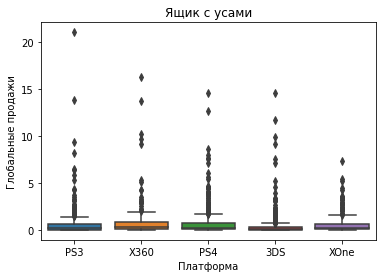

In [36]:
# построим ящик с усами

sns.boxplot(data=top_5, x='platform', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

Построим чуть ближе, чтобы были видны показатели медиан

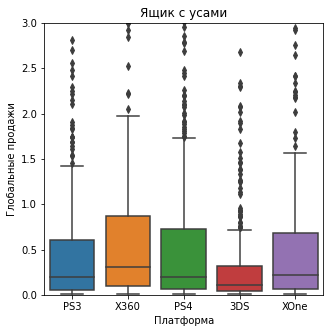

In [37]:
plt.figure(figsize=(5,5))
plt.ylim(0,3)
plt.title('Ящик с усами')
sns.boxplot(x='platform',y='total_sales',data=top_5)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

Все распределения скошены вправо. Большую неоднородность продаж замечаем у X360 и PS3. Использование этих платформ более растянуто во времени. Возможно, это связано с тем, что платформы продолжали покупаться, несмотря на появление платформ следующего поколения (XOne и PS4), однако стоимость на них стала более доступной.
Наибольшие медианные значения у X360, PS3 и PS4. Максимальных продаж достигли X360, PS3. 
Можно предположить, что в следующие годы платформы новго поколения PS4 и XOne будут продлжать быть популярными и увеличат свои суммарные продажи.

### 3.4 Влияние отзывов на продажи <a id="3.4id"></a>

Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [38]:
# вынесем все данные платформы PS4 в отдельный датафрейм
ps4_platform = top_5.query('platform == "PS4"')
ps4_platform.head(3)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Посчитаем коэффициент корреляции, дисперсию, среднее, медиану и отобразим зависимость на диаграмме рассеяния для платформы PS4.

Коэффициент корреляции: 0.40656790206178095
Дисперсия: 155.28135235575712
Стандартное отклонение: 12.46119385756265


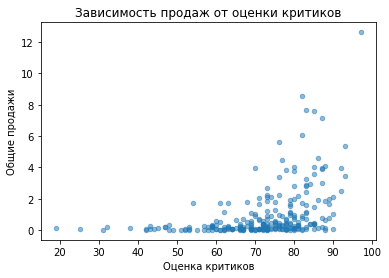

In [39]:
print('Коэффициент корреляции:', ps4_platform['critic_score'].corr(ps4_platform['total_sales']))
print('Дисперсия:', np.var(ps4_platform['critic_score']))
print('Стандартное отклонение:', np.std(ps4_platform['critic_score']))

ps4_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.5)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи');

Связь между оценками критиков и продажами игр прослеживается. Однако она недостаточно большая, чтобы утверждать, что существует прямая зависимость между показателями.

In [40]:
ps4_platform['user_score'] = ps4_platform['user_score'].astype('float')

Коэффициент корреляции: -0.031957110204556424
Дисперсия: 2.121796544989326
Стандартное отклонение: 1.4566387832916319


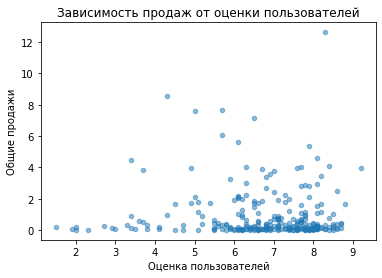

In [41]:
print('Коэффициент корреляции:', ps4_platform['user_score'].corr(ps4_platform['total_sales']))
print('Дисперсия:', np.var(ps4_platform['user_score']))
print('Стандартное отклонение:', np.std(ps4_platform['user_score']))

ps4_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.5)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи');

Связь между оценками пользователей и уровнем продаж очень слабая. Невозможно утвержать, что оценки в данном случае могут как-то повлиять на продажи.

Сохраним топ-5 платформ в отдельный список

In [42]:
top_5_list = ['X360','PS3','3DS','PS4','XOne']

In [43]:
top_5_list

['X360', 'PS3', '3DS', 'PS4', 'XOne']

In [44]:
def scatter_table(name_of_platform):
    platform = top_5[top_5['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    print('Зависимость продаж от оценок пользователей:', round(correl,4))
    print('Зависимость продаж от оценок критиков:', round(critic_correl,4))
    

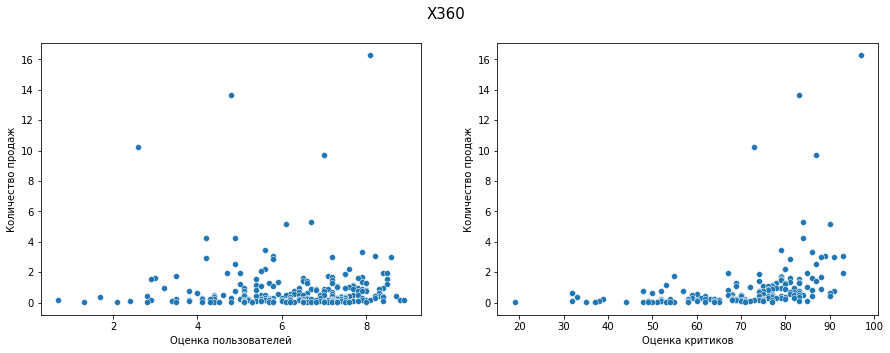

Зависимость продаж от оценок пользователей: 0.0062
Зависимость продаж от оценок критиков: 0.3606


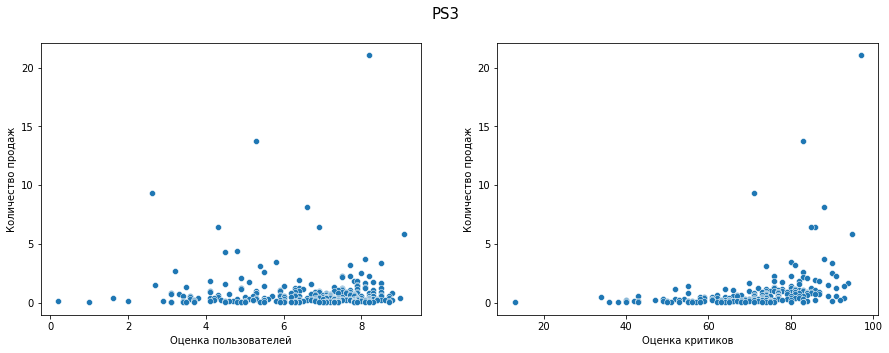

Зависимость продаж от оценок пользователей: -0.0051
Зависимость продаж от оценок критиков: 0.3315


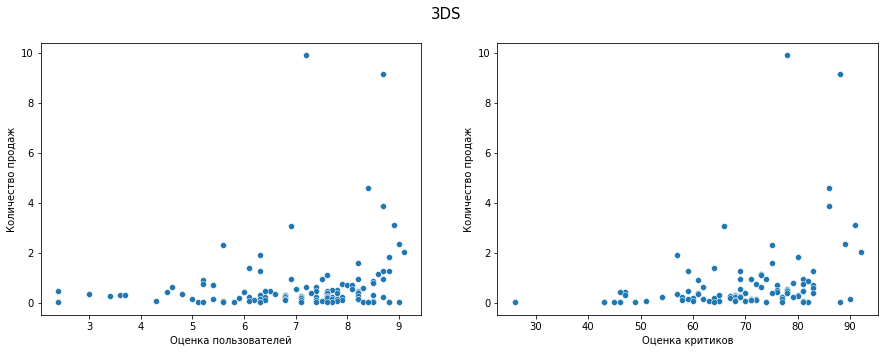

Зависимость продаж от оценок пользователей: 0.1976
Зависимость продаж от оценок критиков: 0.3208


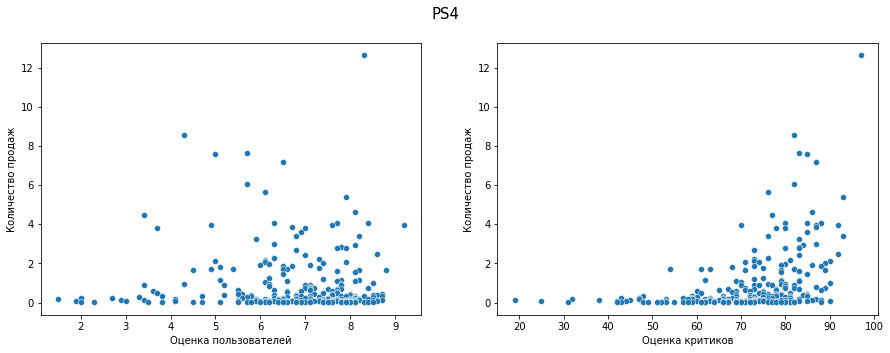

Зависимость продаж от оценок пользователей: -0.032
Зависимость продаж от оценок критиков: 0.4066


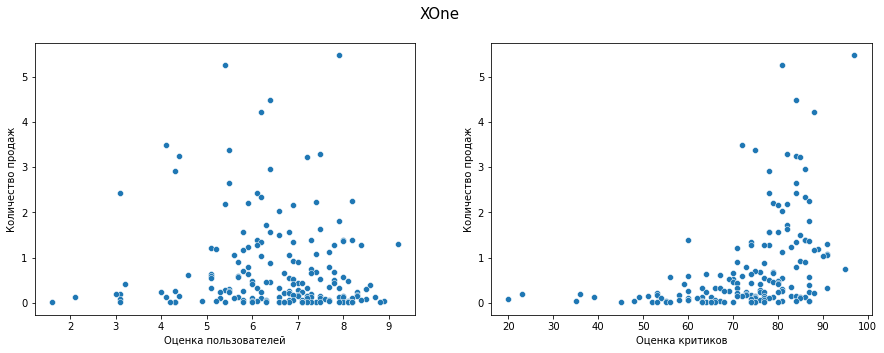

Зависимость продаж от оценок пользователей: -0.0689
Зависимость продаж от оценок критиков: 0.417


In [45]:
for platform in top_5_list:
    scatter_table(platform)

Зависимость продаж от оценок пользователей по всем платформам очень мала. В некоторых случая - даже отрицательна. А вот говорить о влиянии оцено критиков на продажи мы все-таки можем.

### 3.5 Распределение игр по жанрам <a id="3.5id"></a>

Чтобы оценить размеры самых продаваемых жанров, создадим сводную таблицу по жанрам игр и сумме их продаж. Для наглядности построим диаграмму

In [46]:
sales_by_genre = top_5.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_by_genre

,total_sales
genre,
Action,376.25
Shooter,282.11
Sports,167.81
Role-Playing,151.26
Misc,48.78
Racing,42.18
Fighting,35.53
Platform,34.13
Simulation,25.16


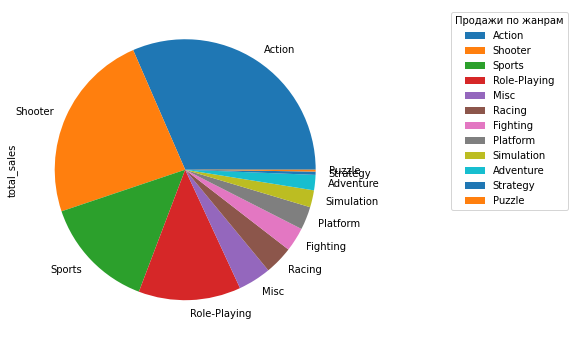

In [47]:
sales_by_genre.plot.pie(subplots=True, figsize=(6, 6))
plt.legend(title='Продажи по жанрам', bbox_to_anchor=(1.3, 1), loc='upper left');

Чтобы оценить какие жанры стабильно приносят высокий доход, рассчитаем по медианным значениям.

In [48]:
sales_by_genre_median = top_5.pivot_table(
    index='genre', values='total_sales', aggfunc='median'
).sort_values(by='total_sales', ascending=False).reset_index()
sales_by_genre_median

,genre,total_sales
0,Shooter,0.585
1,Sports,0.390
2,Racing,0.225
3,Platform,0.210
4,Role-Playing,0.200
5,Fighting,0.180
6,Action,0.170
7,Misc,0.150
8,Simulation,0.130
9,Strategy,0.085


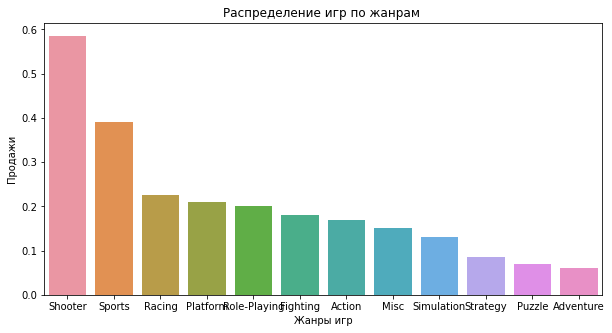

In [49]:
plt.figure(figsize=(10,5))
plt.title('Распределение игр по жанрам ')
sns.barplot(data=sales_by_genre_median, x='genre', y='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи');

Самыми прибыльными жанрами по суммарным продажам за изучаемый период оказались: Action, Sports, Shooter, Role-Playing. 
Для медианных значений таковыми оказались Fighting, Sports, Misc, Shooter.
Скорее всего, именно эти жанры больше всего вовлекают пользователя в процесс и помогают абстрагироваться от реальной жизни. Подобные игры "затягивают" пользователя в другой мир. При планировании рекламной компании на следующий год необходимо делать ставку именно на эти жанры.
На последних местах в обоих случаях оказались Adventure, Strategy и Puzzle, которые, как правило требуют большей концентрации и обдумывания.

**Вывод**

Изучив динамику игровых платформ в промежутке с 1985 по 2016 года, мы зафиксировали достаточной долгий подъем индустрии после кризиса 1983-1985 гг в течение последующих 10 лет. С 2000 гг. вплоть до 2008 рынок резко возрастал и развивался, после чего случился спад в связи с финансовой ситуацией в мире.

Для того, чтобы при подготовке рекламных компаний возможно было опираться на актуальные данные, мы ограничили выборку данными за последние пять лет (с 2012 года).

Определили, что в среднем продолжительность жизни платформы составляет 8,4 лет. Через 2-4 года платформа достигает пика своих показателей, после продажи идут на спад, а на место старой платформы на рынок выходит ее обновленная версия.

Оценка зависимости объема продаж от оценок пользователей и критиков не сильно большая. Тем не менее, вероятно, критики могут в какой-то степени влиять на продажи.

Самыми продаваемыми игровыми жанрами оказались Action, Sports, Shooter, Role-Playing.
Медианные значения наибольшие у Fighting, Sports, Misc, Shooter.

## 4. Портреты пользователей по регионам <a id="4id"></a>

Создадим портреты пользователей за последние пять лет. Определим для пользователя каждого региона (NA, EU, JP) следующие параметры:

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Создадим функию, которая будет принимать на вход три параметра:
- index - платформа, жанр, рейтинг
- region - рассматриваемый регион
- title - название графика

In [50]:
def user_portrait(index, region, title):
    region_stat = top_5.pivot_table(
        index=index, values=region, aggfunc='sum'
    ).sort_values(by=region, ascending=False).reset_index().head(5)
    display(region_stat)

    plt.figure(figsize=(10,5))
    plt.title(title)
    sns.barplot(data=region_stat, x=index, y=region)
    plt.xlabel(index)
    plt.ylabel('Продажи');

### 4.1 Портрет пользователя Северной Америки <a id="4.1id"></a>

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


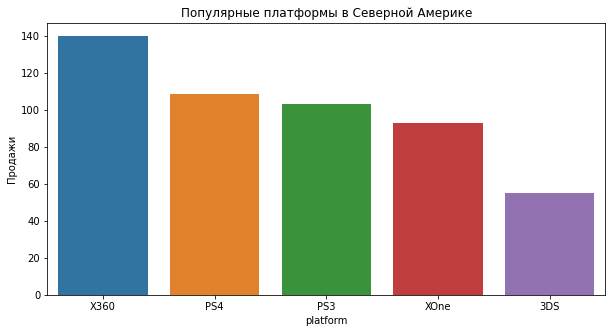

In [51]:
# популярные платформы

user_portrait('platform', 'na_sales', 'Популярные платформы в Северной Америке')

,genre,na_sales
0,Action,153.47
1,Shooter,136.53
2,Sports,77.65
3,Role-Playing,51.81
4,Misc,22.86


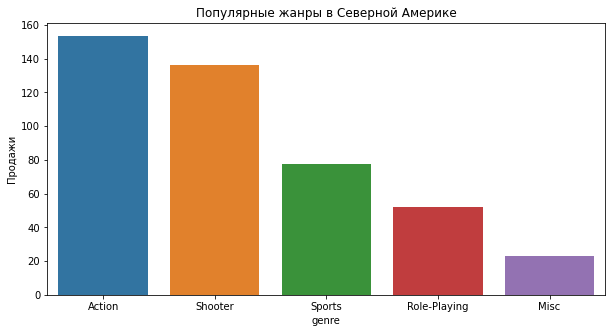

In [52]:
# популярные жанры

user_portrait('genre', 'na_sales', 'Популярные жанры в Северной Америке')

,rating,na_sales
0,M,214.11
1,E,93.39
2,T,56.07
3,E10+,47.99


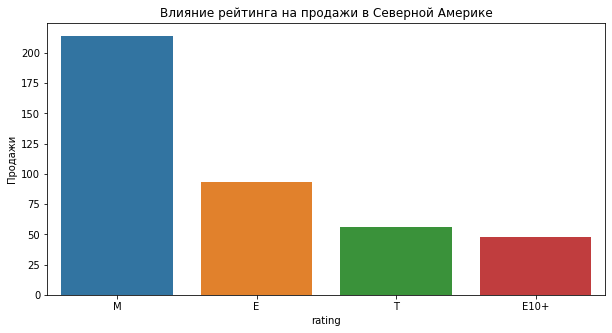

In [53]:
# влияние рейтинга на продажи

user_portrait('rating', 'na_sales', 'Влияние рейтинга на продажи в Северной Америке')

- **Популярные платформы:** X360, PS3, PS4, XOne, 3DS.	
- **Популярные жанры игр:** Shooter, Action, Sports, Role-Playing, Misc.
- **Влияние рейтинга:** Больше всего продавались игры с рейтингами: "От 17 лет", «Подросткам 13—19 лет», "Для всех"

### 4.2 Портрет пользователя Европы <a id="4.2id"></a>

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


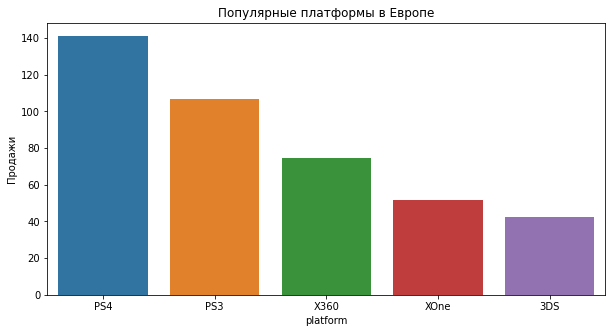

In [54]:
# популярные платформы в Европе

user_portrait('platform', 'eu_sales', 'Популярные платформы в Европе')

,genre,eu_sales
0,Action,136.51
1,Shooter,102.87
2,Sports,63.30
3,Role-Playing,38.04
4,Racing,22.70


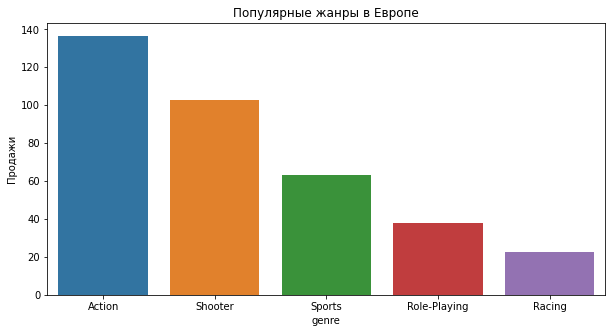

In [55]:
# популярные жанры

user_portrait('genre', 'eu_sales', 'Популярные жанры в Европе')

,rating,eu_sales
0,M,172.57
1,E,91.71
2,T,41.78
3,E10+,34.22


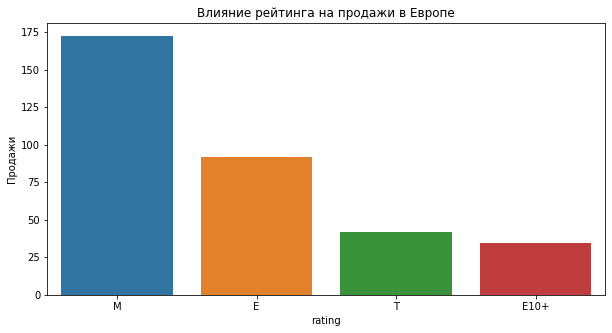

In [56]:
# влияние рейтинга на продажи

user_portrait('rating', 'eu_sales', 'Влияние рейтинга на продажи в Европе')

- **Популярные платформы:** PS3, X360, PS4, XOne, 3DS
- **Популярные жанры:** Action, Shooter, Sports, Racing, Role-Playing
- **Влияние рейтинга:** Больше всего продавались игры с рейтингами: "От 17 лет", «Подросткам 13—19 лет», "Для всех"

### 4.3 Портрет пользователя Японии <a id="4.3id"></a>

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PS4,15.96
3,X360,1.57
4,XOne,0.34


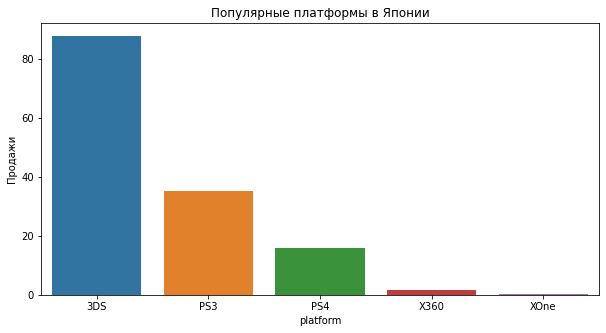

In [57]:
# популярные платформы в Японии 

user_portrait('platform', 'jp_sales', 'Популярные платформы в Японии')

,genre,jp_sales
0,Role-Playing,49.49
1,Action,40.95
2,Simulation,10.23
3,Shooter,7.58
4,Fighting,7.41


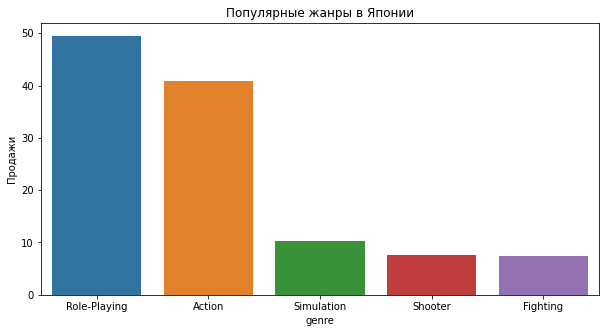

In [58]:
# популярные жанры

user_portrait('genre', 'jp_sales', 'Популярные жанры в Японии')

,rating,jp_sales
0,E,19.98
1,T,19.51
2,M,18.96
3,E10+,4.82


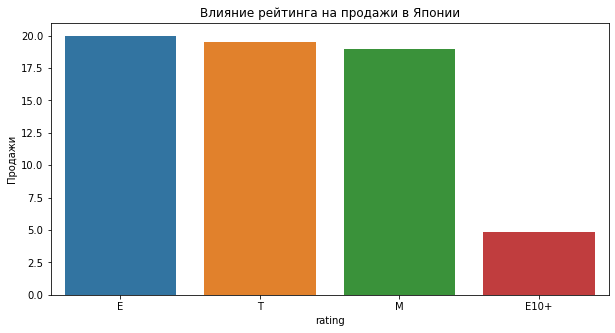

In [59]:
# влияние рейтинга на продажи

user_portrait('rating', 'jp_sales', 'Влияние рейтинга на продажи в Японии')

- **Популярные платформы:** PS3, 3DS, X360, PS4, XOne
- **Популярные жанры:** Action, Role-Playing, Shooter, Simulation, Platform
- **Влияние рейтинга:** Больше всего продавались игры с рейтингами: "От 17 лет", «Подросткам 13—19 лет», "Для всех"

Рассчивав прожажи по платформам во всех трех регионах, можно узнать, какую долю каждыя платформа занимает в общей сумме продаж. 
Соединим информацию по продажам игр на платформах всех регионов и посчитаем для каждой процент в своем регионе.

In [60]:
pv = pd.pivot_table(
    top_5, index='platform', 
    values=['jp_sales', 'eu_sales', 'na_sales', 'total_sales'], 
    aggfunc='sum'
).reset_index()
pv

,platform,eu_sales,jp_sales,na_sales,total_sales
0,3DS,42.64,87.79,55.31,194.61
1,PS3,106.86,35.29,103.38,288.79
2,PS4,141.09,15.96,108.74,314.14
3,X360,74.52,1.57,140.05,236.54
4,XOne,51.59,0.34,93.12,159.32


Добавим колонки с процентным отношением продаж каждой платформы по региону от мирового объема.

In [61]:
pv['na%'] = round(pv['na_sales'] / pv['total_sales'] * 100, 2)
pv['eu%'] = round(pv['eu_sales'] / pv['total_sales'] * 100, 2)
pv['jp%'] = round(pv['jp_sales'] / pv['total_sales'] * 100, 2)
pv

,platform,eu_sales,jp_sales,na_sales,total_sales,na%,eu%,jp%
0,3DS,42.64,87.79,55.31,194.61,28.42,21.91,45.11
1,PS3,106.86,35.29,103.38,288.79,35.80,37.00,12.22
2,PS4,141.09,15.96,108.74,314.14,34.62,44.91,5.08
3,X360,74.52,1.57,140.05,236.54,59.21,31.50,0.66
4,XOne,51.59,0.34,93.12,159.32,58.45,32.38,0.21


Для платформ X360, XOne в значительной степени важен рынок Северной Америки, так как доля продаж от общемировых составляет больше половины (почти 60%). В европейском регионе значительную часть рынка занимают платформы PS4 и PS3. Большую долю от общемировых продаж в Японии занимает японская платформа 3DS.

Построим сводную таблицу, в которой будут приведены суммарные общемировые продажи для каждой платформы за каждый год актуального периода. 

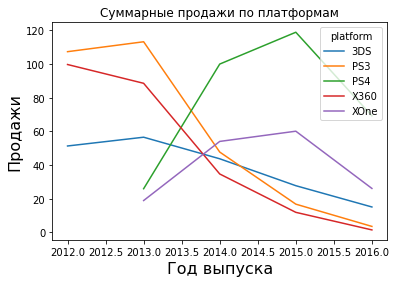

In [62]:
top_5.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).plot()

plt.xlabel('Год выпуска', fontsize=16)
plt.ylabel('Продажи', fontsize=16)
plt.title('Суммарные продажи по платформам');

Видим, что несмотря на то, что все платформы на момент 2015 года идут на убыль прибыли, пока еще можно делать ставку на PS4 и XOne, которые в ближайшие пару лет смогут приносить достаточно высокую прибыль.

### Игры без рейтинга

В нашем датасете присутствует 693 игры без рейтинга ESRB. 
Отсутствие рейтинга скорее связано с тем, что данная рейтинговая система обязательна только для США и Канады.
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Проанализируем продажи игр без рейтинга

In [63]:
top_5['rating'].isna().sum()

693

In [64]:
# заполним пустые значения на "None"

top_5['rating'] = top_5['rating'].fillna(value='None')

In [65]:
# создадим датафрейм только с пропущенными значениями рейтинга

without_rating = top_5.query('rating == "None"')

In [66]:
# создадим сводную по суммарным продажам игр в разных регионах с неизвестным рейтингом

without_rating = pd.pivot_table(
    without_rating, index='platform', 
    values=['jp_sales', 'eu_sales', 'na_sales', 'total_sales'], 
    aggfunc='sum'
).reset_index()
without_rating

,platform,eu_sales,jp_sales,na_sales,total_sales
0,3DS,20.21,60.00,24.75,109.05
1,PS3,12.44,11.23,12.15,40.89
2,PS4,27.99,6.25,23.77,68.20
3,X360,7.48,0.15,13.74,23.42
4,XOne,8.30,0.05,14.63,25.26


In [67]:
# узнаем долю продаж игр, которые не получили рейтинг, в разных регионах

without_rating['na%'] = round(without_rating['na_sales'] / without_rating['total_sales'] * 100, 2)
without_rating['eu%'] = round(without_rating['eu_sales'] / without_rating['total_sales'] * 100, 2)
without_rating['jp%'] = round(without_rating['jp_sales'] / without_rating['total_sales'] * 100, 2)
without_rating

,platform,eu_sales,jp_sales,na_sales,total_sales,na%,eu%,jp%
0,3DS,20.21,60.00,24.75,109.05,22.70,18.53,55.02
1,PS3,12.44,11.23,12.15,40.89,29.71,30.42,27.46
2,PS4,27.99,6.25,23.77,68.20,34.85,41.04,9.16
3,X360,7.48,0.15,13.74,23.42,58.67,31.94,0.64
4,XOne,8.30,0.05,14.63,25.26,57.92,32.86,0.20


Как показывает сводная таблица, в Японии оказалось внушительная доля рынка для платформ 3DS и PS3. Так как в Японии действует собственная рейтинговая система CERO, то при анализе влияния рейтинга на продади стоит это учитывать.
https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization

**Вывод**

Проанализировав популярные платформы, жанры и рейтинг по каджому региону за последние пять лет, мы смогли составить примерный портрет пользователя, который поможет в составлении рекламной компании.

Пользователи Северной Америки и Европы достаточно схожи: по медианным показателям продажам лидируют платформы Xbox One и PlayStation 4. Продажи игр на платформе Nintendo 3DS замыкают пятерку. 

Противоположная ситуация в Японии. Nintendo 3DS располагается на втором месте сразу после PlayStation 3. PlayStation 3 является лидером продаж во всех терх регионах.

Жанр игры "Action" подтверждает свою популярность. Во всех регионах он входит в двойку самых восстребованных. Здесь предпочтения пользователей Северной Америки и Европы также схожи. А в Японии мы наюлюдаем выход в пятерку лучших таких жанров, как Simulation и Platform.

Самыми продаваемыми играми в Северной Америке и Евроме являются игры с рейтингом M («от 17 лет»). В Японии почти на равне с играми рейтинга M хорошо продаются и игры рейтинга T ("«Teen»"). Однако стоит учитывать, что в Японии своя рейтинговая система, поэтому необходимо сопоставить рейтинги в двух системах (сделать перевод с японской в американскую, например) для меньшего появления пустых значений. В таком случае мы сможем точнее определеить влияние рейтинга на продажи в различных регионах.

## 5. Проверка гипотез <a id="5id"></a>

### 5.1 Гипотеза 1 <a id="5.1id"></a>

Для проверки гипотезы сформулируем нулевую и альтернативную гипотезы:

    H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    H1: cредние пользовательские рейтинги платформ Xbox One и PC различаются

Наша альтернативная гипотеза двусторонняя. Для проверки гипотез используем t-test_ind, так как выборки не зависят друг от друга. Уровень статистической значимости зададим в 5%


В столбцах 'user_score' и 'critic_score' у нас было много пропусков. Чтобы p-значение не показало 'nan', заменим все пропуски на значение, которое будет легко отбросить срезом данных (например, число 999). Не забудем отсортировать данные за актуальный период (с 2012 года).

In [68]:
# заменяем пустые значения
df['user_score'] = df['user_score'].fillna(999)

In [69]:
# делаем срезы для каждой платформы по оценке пользователя
# и создаем две выборки данных для проверки гипотезы

xbox_avg = df.query('user_score != 999 and year_of_release > 2011')
xbox_avg = xbox_avg.loc[xbox_avg['platform'] == 'XOne']['user_score'].astype('float')

pc_avg = df.query('user_score != 999 and year_of_release > 2011')
pc_avg = pc_avg.loc[pc_avg['platform'] == 'PC']['user_score'].astype('float')

Ниже сопоставили дисперсии двух выборок. Дисперсии неравные, поэтому при применении t-теста используем парамет equal_var = False, означающий неравенство дисперсий.

In [70]:
print('Дисперсия выборки платформы Xbox One:', np.var(xbox_avg, ddof=1))
print('Дисперсия выборки платформы PC:', np.var(pc_avg, ddof=1))

Дисперсия выборки платформы Xbox One: 1.9069968429360695
Дисперсия выборки платформы PC: 2.770443997158418


In [71]:
alpha = .05

results = st.ttest_ind(xbox_avg, pc_avg, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:** в данном случае уровень статистической значимости слишком большой, чтобы делать вывод о значимом различии между пользовательскими рейтингами платформ Xbox One и PC(42%). 

### 5.2 Гипотеза 2 <a id="5.2id"></a>

    H0: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
    H1: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Уровень статистической значимости зададим в 5%

In [72]:
# заменяем пустые значения
df['critic_score'] = df['critic_score'].fillna(999)

In [73]:
# делаем срезы для каждого жанра по оценке пользователя
# и создаем две выборки данных для проверки гипотезы

action_avg = df.query('user_score != 999 and year_of_release > 2011')
action_avg = action_avg.loc[action_avg['genre'] == 'Action']['user_score'].astype('float')

sports_avg = df.query('user_score != 999 and year_of_release > 2011')
sports_avg = sports_avg.loc[sports_avg['genre'] == 'Sports']['user_score'].astype('float')

Ниже сопоставили дисперсии двух выборок. Дисперсии неравные, поэтому при применении t-теста используем парамет equal_var = False, означающий неравенство дисперсий.

In [74]:
print('Дисперсия выборки по жанру Action:', np.var(action_avg, ddof=1))
print('Дисперсия выборки по жанру Sports:', np.var(sports_avg, ddof=1))

Дисперсия выборки по жанру Action: 1.8890840494348111
Дисперсия выборки по жанру Sports: 3.022890298704732


In [75]:
alpha = .05

results = st.ttest_ind(action_avg, sports_avg, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод:** в данном случае разница между выборками слишком велика, чтобы считать это случайностью. Отвергаем гипотезу о равенстве пользовательских рейтингов жанров Action и Sports.

## 6. Вывод <a id="6id"></a>

Для исследования мы получили данные о продажах игр интернет-маназина "Стримчик", оценки пользователей и экспертов, жанры и платформы. Главной целью являлось проведение анализа, на основе которого необходимо выделить потенциально популярный продукт и спланировать рекламную кампанию на будущий год.

Перед анализом мы произвели подготовку данных:
- привели данные к нужным типам
- обработали пропущенные значения
- рассчитали дополнительные данные для анализа (сумма продаж по всем изучаемым регионам)

Провели исследовательский анализ данных:
- оценили количество выпускаемых игр в разные годы
- отследили динамику продаж по платформам и годам
- провели анализ актуального периода 2012 - 2016 гг
- дали оценку влиянию отзывов на продажи
- составили распределение игр по жанрам

Для того, чтобы при составлении рекламной кампании можно было лучше учеть потребности местного рынка, мы создали пользовательские портреты для Северной Америки, Японии и Европы за последние пять лет.

Были выдвинуты две гипотезы о пупулярных платформах и жанрах.

**Что необходимо учесть при составлении рекламной кампании на 2016 год:**

- После 2008 года рынок сильно просел, однако, есть все предпосылки, что в последующие годы индустрия будет постепенно восстанавливаться;
- Учитывая, что продолжительность жизни платформ ограничивается 8-10 годами, а своего  пика достигает на 2-4 годы существования, то важно отследить платформы нового поколения, которые будут набирать обороты в ближайшие несколько лет;
- Основными популярными платформами все еще являются PS3 и x360, но продажи уже сильно снижены. Платформы PS4 и XOne в следующие несколько лет все еще будут приносить достаточно высокую прибыль. Стоит сделать акцент на них;
- В Японии самой популярной платформой является Nintendo 3DS. Однако при построении стратегии важно понимать, что доля японского рынка относительного американского и европейского очень мала. Возможно, стоит выстраивать отдельную линию по продвижению в азиатском регионе;
- Оценка зависимости объема продаж от оценок пользователей и критиков не сильно большая. Тем не менее, цифры сообщают, что критики могут в определенной степени влиять на продажи;
- Самыми продаваемыми игровыми жанрами за последние 5 лет оказались Action, Sports, Shooter, Role-Playing. В Японии к лидерам присоединились жанры Simulation, Platform.